# Chapter 10: How to make predictions with a linear regression model

In [ ]:
import pandas as pd
import seaborn as sns

## Get the data

In [ ]:
housingPath = 'housingData.csv'
housing = pd.read_csv(housingPath)

In [ ]:
housing.describe().T

In [ ]:
housing.shape

In [25]:
housing = housing.query('sqft_living < 8000 and price < 1000000 and price > 0')
housing.shape

(4207, 11)

In [ ]:
housing['has_basement'] = housing['sqft_basement'].apply(
    lambda x: True if x > 0 else False)
housing.head(10)

In [ ]:
housing.info()

In [ ]:
housing = housing.drop(columns=['date','street','city','statezip','country',
                                'sqft_lot','yr_renovated','sqft_basement'])

## The Housing dataset

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4207 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4207 non-null   float64
 1   bedrooms      4207 non-null   float64
 2   bathrooms     4207 non-null   float64
 3   sqft_living   4207 non-null   int64  
 4   floors        4207 non-null   float64
 5   waterfront    4207 non-null   int64  
 6   view          4207 non-null   int64  
 7   condition     4207 non-null   int64  
 8   sqft_above    4207 non-null   int64  
 9   yr_built      4207 non-null   int64  
 10  has_basement  4207 non-null   bool   
dtypes: bool(1), float64(4), int64(6)
memory usage: 365.6 KB


In [11]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3.0,1.50,1340,1.5,0,0,3,1340,1955,False
2,342000.0,3.0,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3.0,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4.0,2.50,1940,1.0,0,0,4,1140,1976,True
5,490000.0,2.0,1.00,880,1.0,0,0,3,880,1938,False


## How to identify correlations with a scatterplot

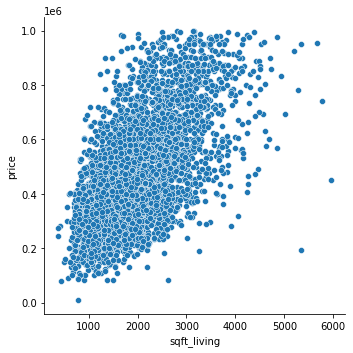

In [12]:
sns.relplot(data=housing, x='sqft_living', y='price')

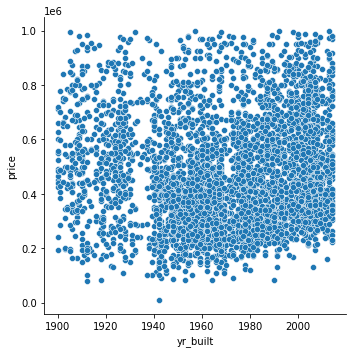

In [13]:
sns.relplot(data=housing, x='yr_built', y='price')

## How to identify correlations with a grid of scatterplots

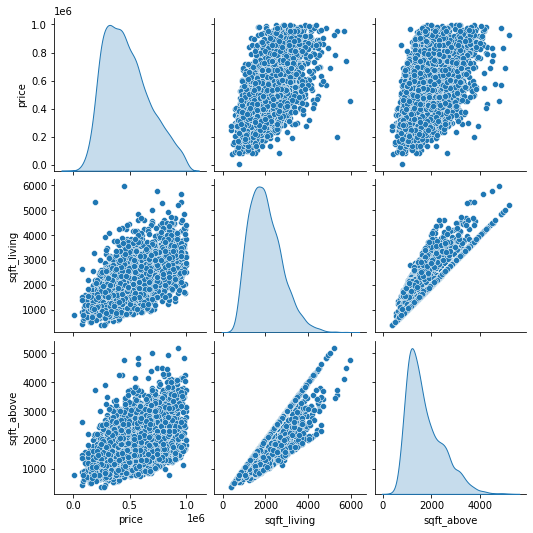

In [14]:
sns.pairplot(data=housing,
             y_vars=['price','sqft_living','sqft_above'], 
             x_vars=['price','sqft_living','sqft_above'], 
             diag_kind='kde')

## How to identify correlations with r-values

In [15]:
# r = coefficient of correlation

housing.corr().head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
price,1.000000,0.305046,0.460155,0.607379,0.272151,0.073671,0.196460,0.044926,0.517395,0.053012,0.152591
bedrooms,0.305046,1.000000,0.516726,0.603655,0.148377,-0.032263,0.060074,0.015105,0.466683,0.154287,0.157001
bathrooms,0.460155,0.516726,1.000000,0.715626,0.495380,0.020700,0.112797,-0.145555,0.637045,0.521801,0.127437
sqft_living,0.607379,0.603655,0.715626,1.000000,0.325647,0.030473,0.184432,-0.086310,0.848312,0.331001,0.175223
floors,0.272151,0.148377,0.495380,0.325647,1.000000,0.008710,-0.006647,-0.298350,0.526227,0.502039,-0.305249


In [16]:
housing.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.607379
sqft_above,0.517395
bathrooms,0.460155
bedrooms,0.305046
floors,0.272151
view,0.196460
has_basement,0.152591
waterfront,0.073671
yr_built,0.053012


## How to identify correlations with a heatmap

<AxesSubplot:>

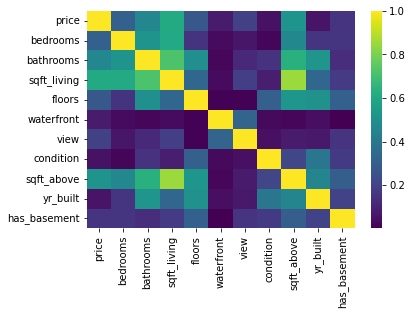

In [23]:
sns.heatmap(data=abs(housing.corr()), cmap='viridis')

<AxesSubplot:>

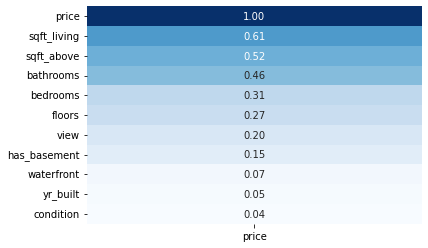

In [21]:
sns.heatmap(data=housing.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## How to create, validate, and use a linear regression model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
#r-squared = coeficient of determination
0.05**2

0.0025000000000000005

In [33]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(
    housing[['sqft_living']], housing[['price']], 
    test_size=0.33, random_state=1500)


<AxesSubplot:ylabel='Density'>

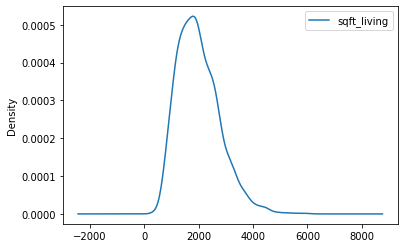

In [34]:
x_train.plot.kde()

<AxesSubplot:ylabel='Density'>

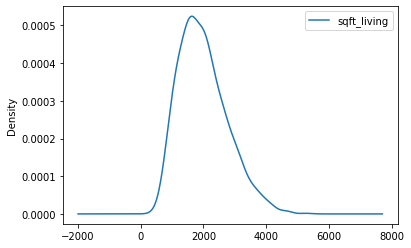

In [35]:
x_test.plot.kde()

In [36]:

# create the model from the training dataset
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

# validate the model with the test dataset
linearModel.score(x_test, y_test)

0.3917253843860399

In [39]:
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[478042.77161293],
       [408353.53979251],
       [750739.76569285],
       ...,
       [726500.03288574],
       [564396.81973824],
       [597726.45234801]])

In [52]:
print( "price = {0} * sqft_living+ {1}".format(str(linearModel.coef_[0][0]),str(linearModel.intercept_[0])))

price = 151.49833004439623 * sqft_living+ 168986.17832236475


In [53]:
housing["price_linreg"] = 151.49833004439623 * housing["sqft_living"]+ 168986.17832236475

In [59]:
housing["price_predict"] = linearModel.predict(housing[['sqft_living']])

<AxesSubplot:xlabel='price_predict'>

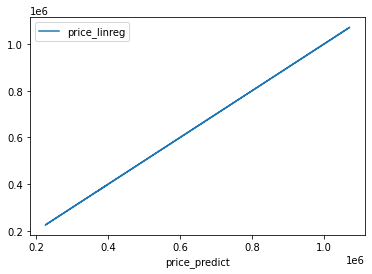

In [60]:
housing.plot(x= 'price_predict', y = "price_linreg")

In [54]:
housing.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement,price_linreg
0,313000.0,3.0,1.50,1340,1.5,0,0,3,1340,1955,False,371993.940582
2,342000.0,3.0,2.00,1930,1.0,0,0,4,1930,1966,False,461377.955308
3,420000.0,3.0,2.25,2000,1.0,0,0,4,1000,1963,True,471982.838411
4,550000.0,4.0,2.50,1940,1.0,0,0,4,1140,1976,True,462892.938608
5,490000.0,2.0,1.00,880,1.0,0,0,3,880,1938,False,302304.708761


In [57]:
melted = pd.melt(housing, id_vars=['sqft_living'], 
                 value_vars=['price','price_linreg'], 
                 var_name='price_type', value_name='price_value')
melted

,sqft_living,price_type,price_value
0,1340,price,313000.000000
1,1930,price,342000.000000
2,2000,price,420000.000000
3,1940,price,550000.000000
4,880,price,490000.000000
...,...,...,...
8409,1510,price_linreg,397748.656689
8410,1460,price_linreg,390173.740187
8411,3010,price_linreg,624996.151756
8412,2090,price_linreg,485617.688115


## How to plot the predicted data

In [40]:
# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['sqft_living'], 
                 value_vars=['price','price_predicted'], 
                 var_name='price_type', value_name='price_value')

melted.head()

,sqft_living,price_type,price_value
0,2040,price,443500.0
1,1580,price,575000.0
2,3840,price,556000.0
3,1690,price,372977.0
4,2110,price,324000.0


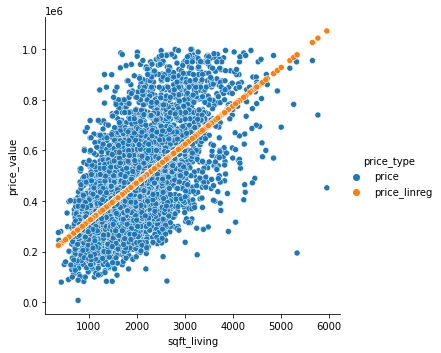

In [58]:
sns.relplot(data=melted, x='sqft_living', y='price_value', 
            hue='price_type')

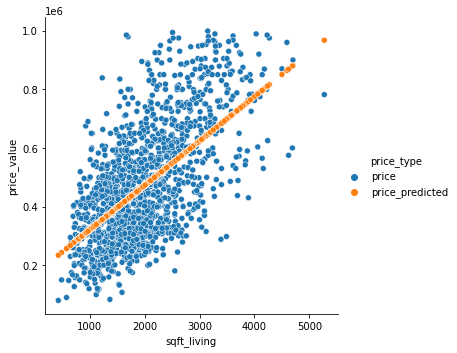

In [41]:
sns.relplot(data=melted, x='sqft_living', y='price_value', 
            hue='price_type')

## How to plot the residuals

In [61]:
combined['residual'] = combined.price - combined.price_predicted
combined.head()

,price_predicted,sqft_living,price,residual
0,478042.771613,2040,443500.0,-34542.771613
1,408353.539793,1580,575000.0,166646.460207
2,750739.765693,3840,556000.0,-194739.765693
3,425018.356097,1690,372977.0,-52041.356097
4,488647.654716,2110,324000.0,-164647.654716


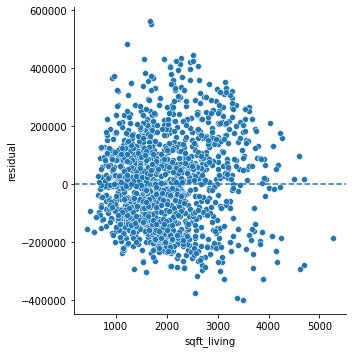

In [62]:
g = sns.relplot(data=combined, x='sqft_living', y='residual')

# draw a horizontal line where the Y axis is 0
for ax in g.axes.flat:    
    ax.axhline(0, ls='--')

<AxesSubplot:ylabel='Frequency'>

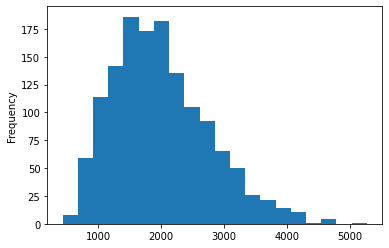

In [66]:
combined.sqft_living.plot.hist(bins=20)

In [68]:
combined["sqft_living_bin"] = pd.qcut(combined.sqft_living, q=20)
sns.catplot(data = combined , kind='box', y="sqft_living_bin",x="residual" , orient='h')

## How to plot a linear regression

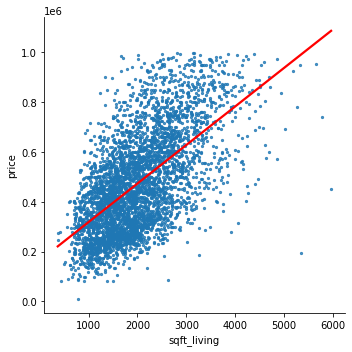

In [75]:
sns.lmplot(data=housing, x='sqft_living', y='price', ci=None,
           scatter_kws={'s':5}, line_kws={'color':'red'})

In [80]:
!pip install statsmodels

## How to plot a logistic regression

ModuleNotFoundError: No module named 'statsmodels'

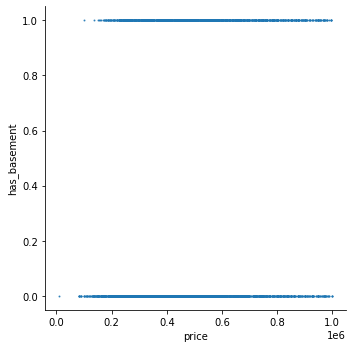

In [79]:
sns.lmplot(data=housing, x='price', y='has_basement', ci=None,
           scatter_kws={'s':1}, line_kws={'color':'red'}, 
           logistic=True)

## How to plot a polynormal regression

In [81]:
# get the data
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1901,01-04 Years,1695.0
2,1902,01-04 Years,1655.7
3,1903,01-04 Years,1542.1
4,1904,01-04 Years,1591.5


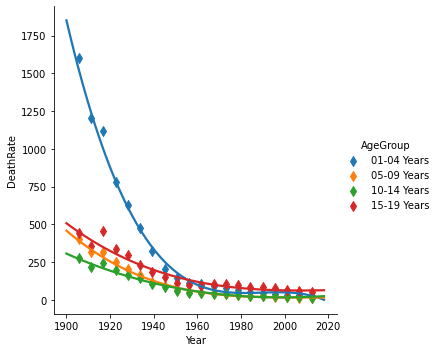

In [82]:
sns.lmplot(x='Year', y='DeathRate', hue='AgeGroup', data=mortality_data, ci=None,
           markers='d', x_bins=20, order=3)

## How to plot a lowess regression

ModuleNotFoundError: No module named 'statsmodels'

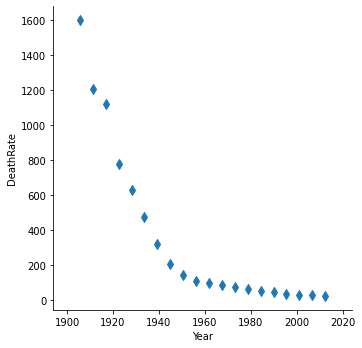

In [83]:
sns.lmplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup', 
           ci=None, markers='d', x_bins=20, lowess=True)

## How to plot residuals with Seaborn

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

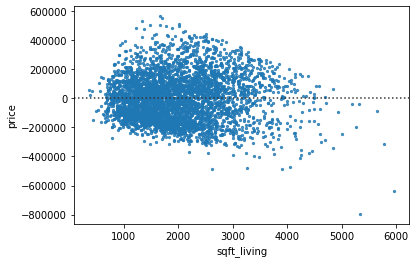

In [84]:
sns.residplot(data=housing, x='sqft_living', y='price', 
              scatter_kws={'s':5})

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

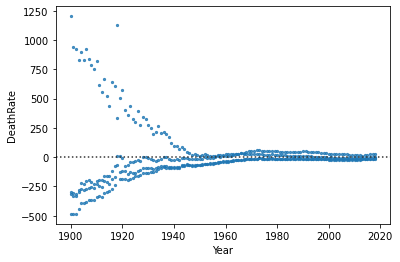

In [85]:
sns.residplot(data=mortality_data, x='Year', y='DeathRate', 
              order=3, scatter_kws={'s':5})